# MNIST with sklearn

The goal of this exercise is to 
* explore some of the sklearn functionality for training a MLP classifier (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
* by using cross validation 
* learn how to compute the confusion matrix and its derived quantities and how to interpret them
* explore the test error as a function of the complexity (number of units, number of layers)
* explore the impact of L2 regularisation

__IMPORTANT REMARK__: We here follow the convention of sklearn to enumerate the samples with the first index. 

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load and prepare the data 

In [29]:
datadir = '/Users/Apple/Documents/Deep Learning/Data'

In [30]:
def normalize(x_train,x_test):
    """
    Normalizes the pixels values of the images - mean and stdev are computed from the training set.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_train -= mean
    x_test -= mean
    x_train /= std
    x_test /= std
    return x_train, x_test

In [31]:
# in case you have trouble with the fetch_openml, use this code
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [33]:
x,y = fetch_openml('mnist_784', data_home=datadir, return_X_y=True)
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=1)
x_train, x_test = normalize(x_train0, x_test0)

## Specify Model Family and learn how to compute the metrics

#### Model
Use the functionality of scikit learn to configure a MLP and its training procedure with
* hidden layers: 0-2 layers with suitable number of units per layer
* mini-batch gradient descent with given batch_size (no advanced optimisers)
* constant learning rate (no learning rate schedules)
* number of epochs
* no regularisation such as L2 penalty or early stopping

#### Metrics
Compute the train and test error resp. accuracy as well as the class precision, recall, f1-score.

__See__:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## First Training Run

Run the training and plot the training loss with a first set of values:
* no hidden layers
* mini-batchsize: 64
* learning rate: 0.1
* 100 epochs

Compute the Metrics.
Which digits are hard to predict?  

#### MODEL

0.9289


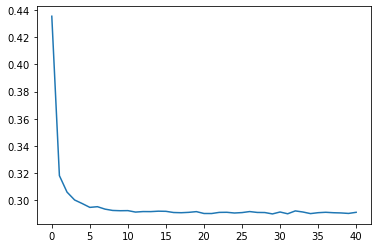

In [40]:
from sklearn.neural_network import MLPClassifier

# Basic Hyperparameters
hidden_layer_sizes = ()
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant
early_stopping = False
n_iter_no_change = 10

### START YOUR CODE ###
# Model instantiation and training

model = MLPClassifier(activation='relu', alpha=learning_rate, batch_size=batch_size, early_stopping=False,
       hidden_layer_sizes=(),
       max_iter=100)

model.fit(x_train0, y_train)


# Plot loss curve

print (model.score(x_train0,y_train))
plt.plot(model.loss_curve_)



### END YOUR CODE ###

#### METRICS

In [43]:
### START YOUR CODE ###

# train and test error, accuracy
# per class accuracy, precision, f1 score

from sklearn.metrics import accuracy_score, classification_report

pred_train = model.predict(x_train0)
pred_test = model.predict(x_test0)


print("Train Acc:", accuracy_score(y_train, pred_train))
print("Test Acc:", accuracy_score(y_test, pred_test))

print(classification_report(y_test,pred_test))




### END YOUR CODE ###

Train Acc: 0.9289
Test Acc: 0.9138
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       959
           1       0.97      0.96      0.96      1186
           2       0.90      0.92      0.91      1035
           3       0.93      0.85      0.89      1031
           4       0.93      0.89      0.91       941
           5       0.88      0.86      0.87       930
           6       0.94      0.95      0.94       942
           7       0.93      0.92      0.93      1050
           8       0.83      0.90      0.86       936
           9       0.87      0.91      0.89       990

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Best Model without Hidden Layer

By first varying just the parameters 
* mini-batchsize
* learning rate
* epochs

with adding any hidden layer.

Summarize what the best combination of the abover hyper-parameters is.

In [ ]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

batch_size = 64
learning_rate = 0.1
nepochs = 100

model = MLPClassifier(hidden_layer_sizes = ())

parameter_space = {
    'alpha': [0.01, 0.1, 0.2, 0.5],
    'batch_size' : [32, 64],
    'max_iter' : [50, 100] #epochs ?
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train0, y_train) 


### END YOUR CODE ###

__BEST MODEL__ (no hidden layer)

batch_size = 

learning_rate = 

nepochs = 

train / validation error :

## Adding one Hidden layer

Explore the performance of the model by varying the parameters 
* mini-batchsize
* learning rate
* epochs
* complexity (number of units in the one hidden layer)

For given complexity, summarize what the best combination of other hyper-parameters is - compute this for several complexities.

Compute also the "best" train and validation error (or accuracy) for given complexity - as a function of the complexity and plot the curve (for selected number of units - e.g. 10 different values). 


In [51]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

hidden_layer_sizes = (100,) # just one layer 
batch_size = 64
learning_rate = 0.1
nepochs = 100



model = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)],
    'alpha': [0.01, 0.1, 0.5],
    'batch_size' : [32, 64],
    'max_iter' : [50, 100] #epochs ?
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train0, y_train) # X is train samples and y is the corresponding labels


### END YOUR CODE ###

KeyboardInterrupt: 

In [47]:
model.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
print('Best parameters found:\n', clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [ ]:
model = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)]
}

from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf2.fit(x_train0, y_train) # X is train samples and y is the corresponding labels


In [1]:
### START YOUR CODE ###

test_scores = clf2.cv_results_['mean_test_score']
train_scores = clf2.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

train / validation error :


## Impact of Regularisation

Explore the Impact of Using L2 Regularisation (still adding just one hidden layer) again by varying mini-batchsize, learning rate, epochs, complexity.

Can you reach a better best model performance (on validation set)?

In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant



model3 = MLPClassifier(alpha = alpha)

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)],
    'learning_rate': [0.01, 0.1, 0.5],
    'batch_size' : [32, 64],
    'max_iter' : [50, 100] #epochs ?
}

clf3 = GridSearchCV(model3, parameter_space, n_jobs=-1, cv=5)
clf3.fit(x_train0, y_train) # X is train samples and y is the corresponding labels


### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###

model4 = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)]
}

clf4 = GridSearchCV(model4, parameter_space, n_jobs=-1, cv=5)
clf4.fit(x_train0, y_train) # X is train samples and y is the corresponding labels

test_scores = clf4.cv_results_['mean_test_score']
train_scores = clf4.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Adding up to 3 Hidden Layers

Now consider using a model with more than one hidden layer (at max 3).


In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,0,0)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (1-3 hidden layers)

hidden_layer_sizes = (*,*,*)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Test Performance of Best Model

Test Error: 